In [246]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [247]:
data=pd.read_csv('baseball.csv')
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [248]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [249]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


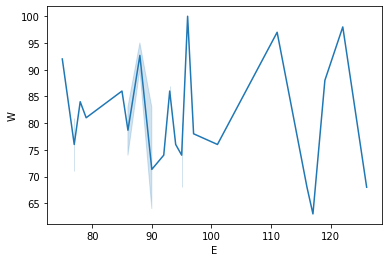

In [250]:
sns.lineplot(x='E',y='W',data=data);

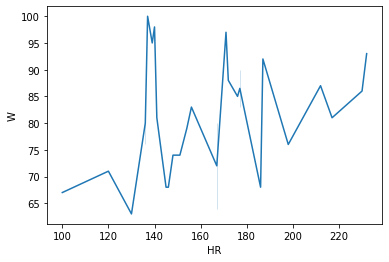

In [251]:
sns.lineplot(x='HR',y='W',data=data);

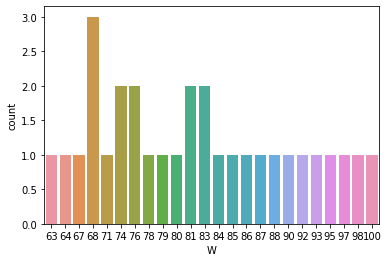

In [253]:
sns.countplot(data['W'])

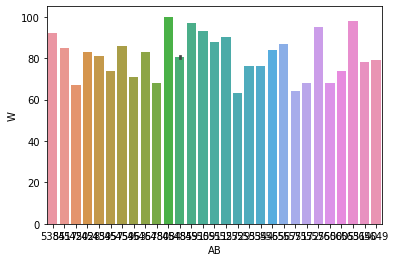

In [256]:
sns.barplot(x='AB',y='W',data=data)

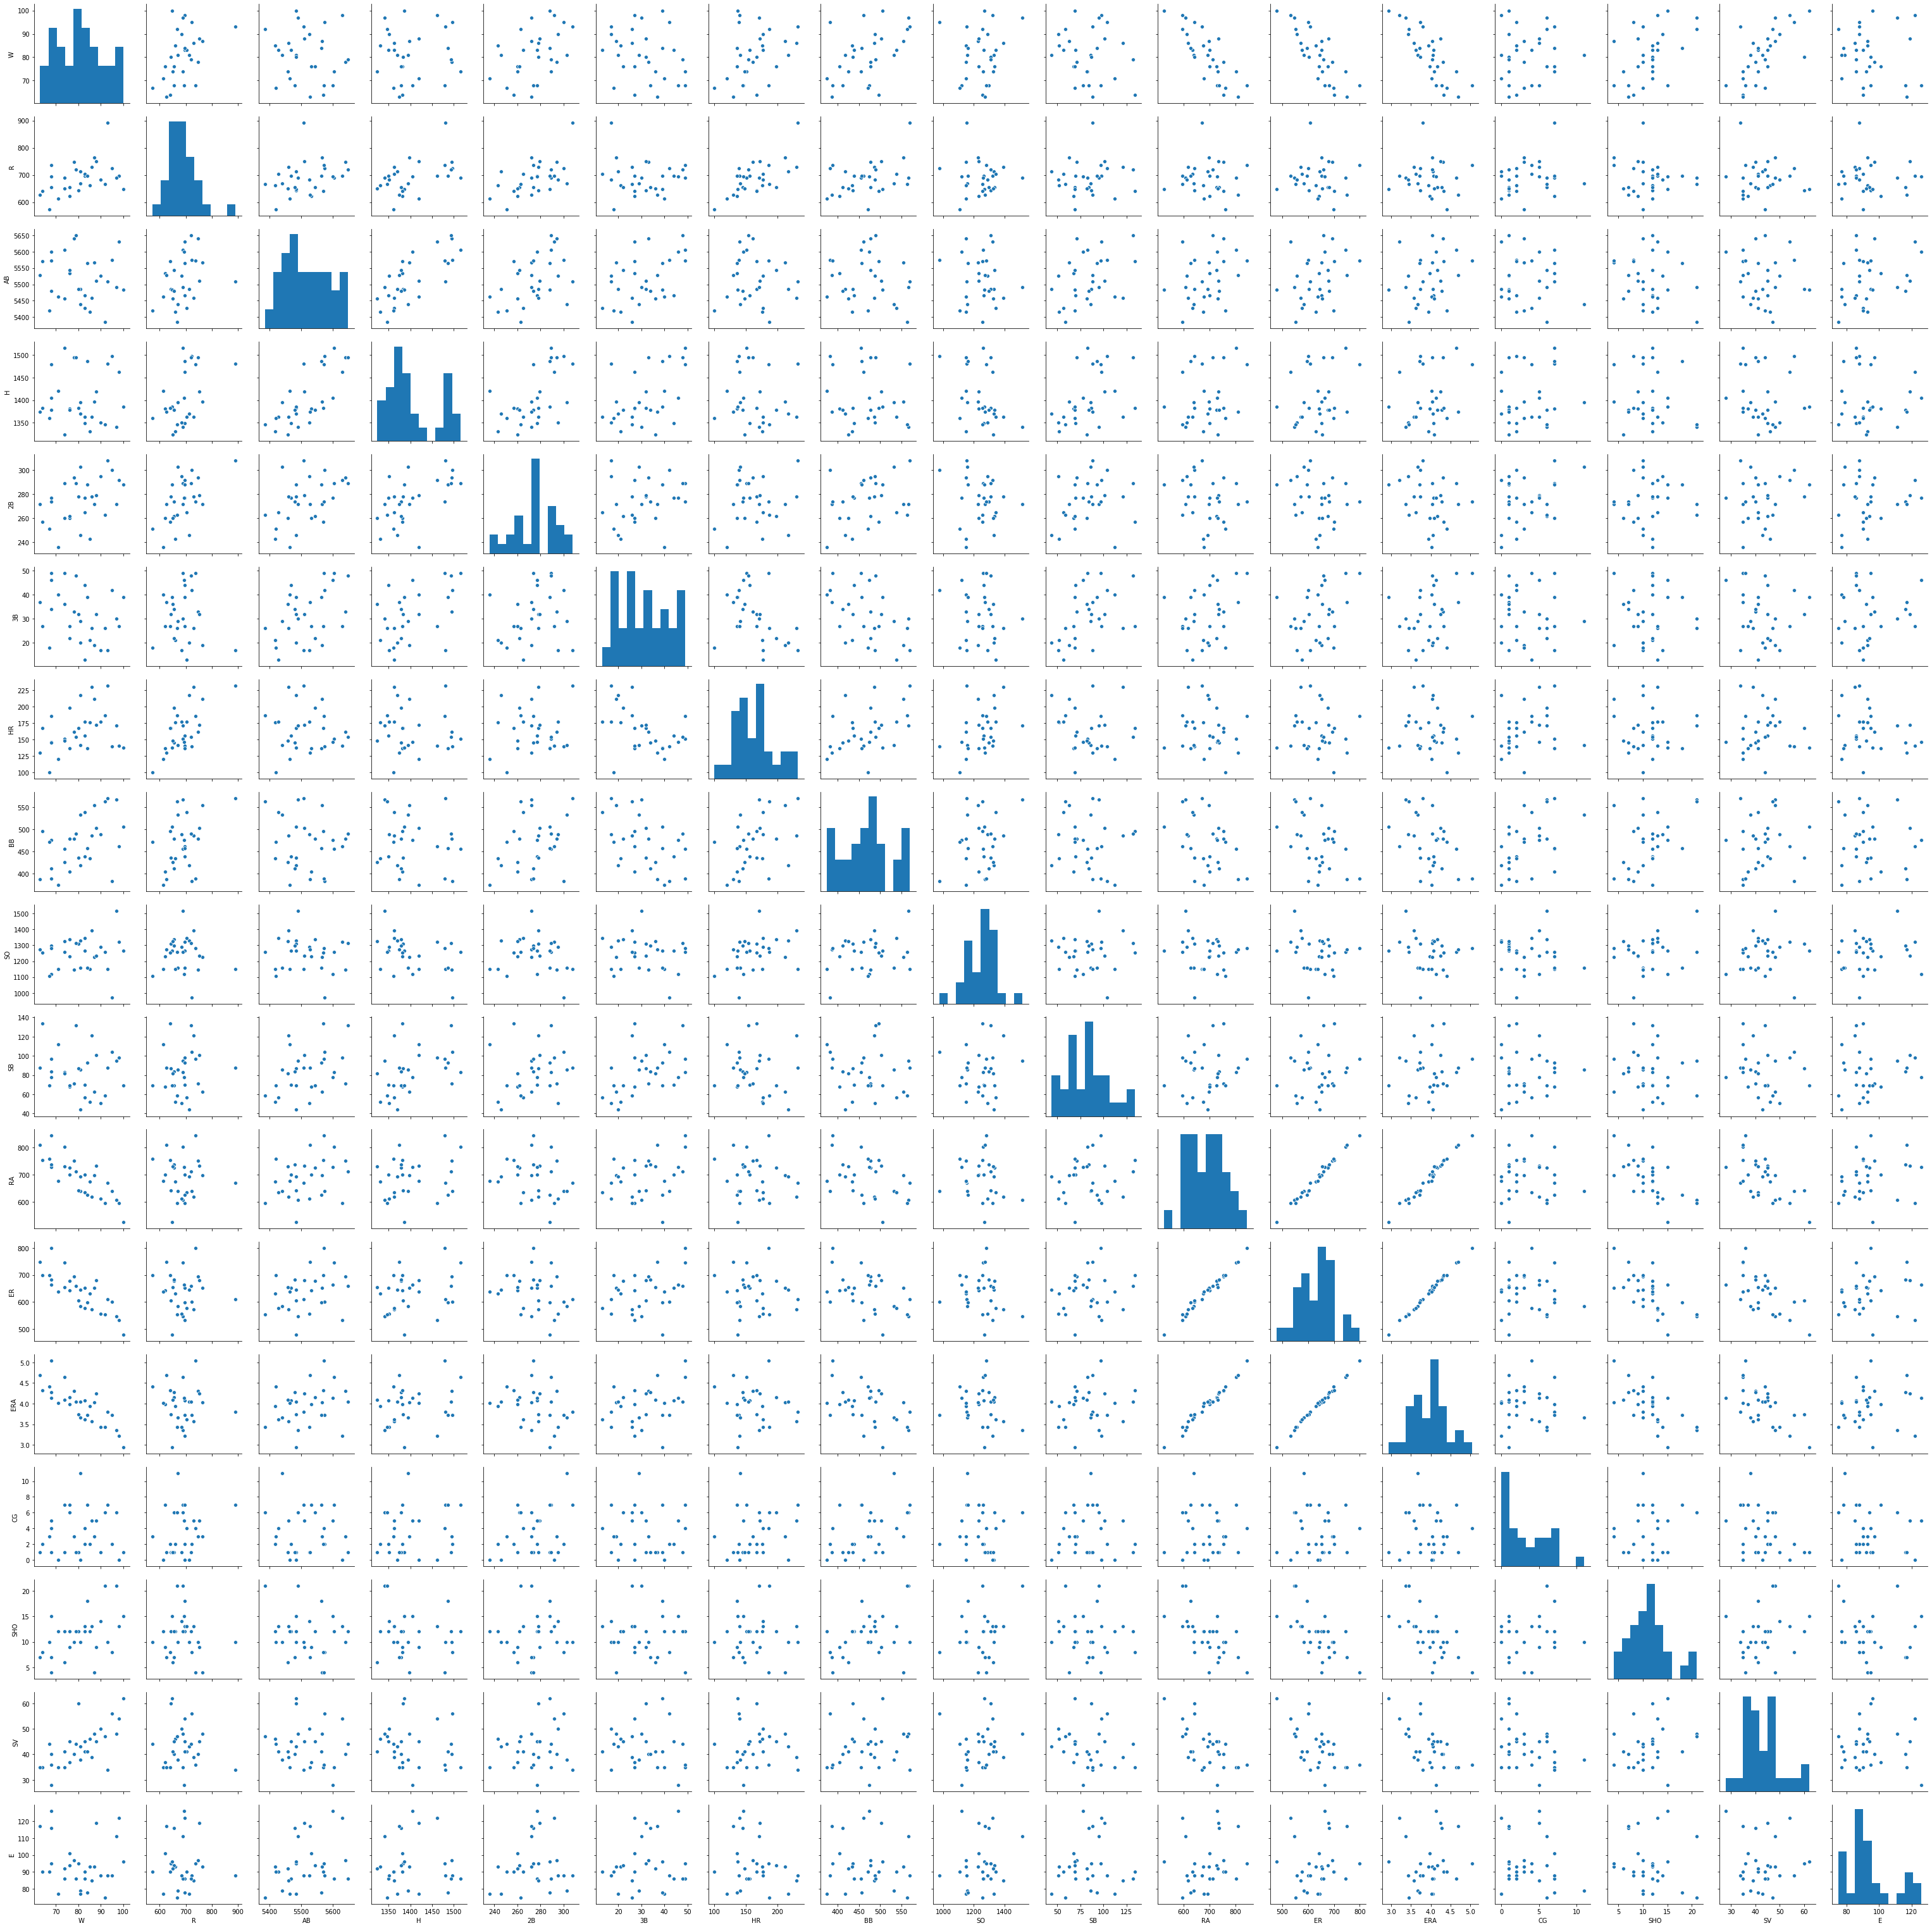

In [257]:
sns.pairplot(data)

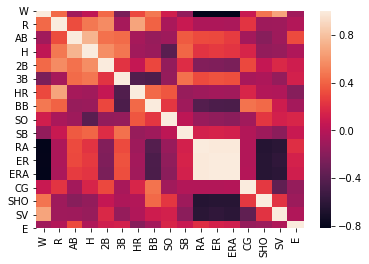

In [206]:
sns.heatmap(data.corr());

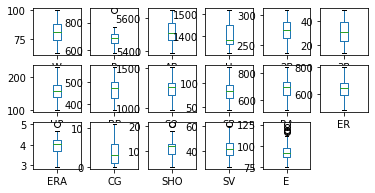

In [207]:
data.plot(kind='box',subplots=True,layout=(4,6));

In [208]:
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(30, 17)
(29, 17)


In [209]:
data=data_final
data.shape

(29, 17)

In [210]:
data.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [211]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [212]:
data.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

In [213]:
for col in data.columns:
    if data.skew().loc[col]<0:
        data[col]=np.power(data[col],2)

In [214]:
data.skew()

W      0.119013
R     -0.052275
AB     0.169573
H      0.738455
2B    -0.205061
3B     0.090124
HR     0.450862
BB     0.151193
SO     0.166534
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.585759
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

In [215]:
data['R']=np.power(data['R'],2)
data['R'].skew()

0.24686337806460334

In [216]:
data['2B']=np.power(data['2B'],2)
data['2B'].skew()

0.04561628276211167

In [217]:
df_x=data.drop('W',axis=1)
y=data['W']

In [218]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df_x)

In [219]:
x.shape,y.shape

((29, 16), (29,))

In [220]:
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.957677,0.830084,1.723726,1.730449,1.010845,-0.765863,-1.536359,-2.480961,0.905953,-0.664514,-0.511148,-0.511388,-0.507316,-0.813262,1.554812,-0.435733
1,0.245019,-0.702831,-0.949846,0.114703,1.208917,-0.181389,-0.495021,0.082236,-0.585315,0.154638,0.232161,0.238952,-0.507316,0.159299,0.296229,-0.598110
2,-0.365390,-1.100253,-0.088700,1.970616,-0.276617,-0.697101,1.252941,-0.937767,0.116458,-0.678397,-0.754153,-0.643801,2.503691,-0.326982,-0.672787,-1.197382
3,-1.265179,0.233951,-0.347747,-0.847430,-0.474688,-0.869006,-1.145857,-0.241960,-0.673037,0.168522,0.089217,0.040333,1.381986,-0.570122,-0.825263,0.538291
4,0.079767,1.255894,2.030708,0.909496,1.704094,-0.353293,-0.197495,0.032564,-0.015124,1.584683,1.561540,1.496876,1.381986,0.159299,-1.142637,-0.598110


In [221]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [222]:
lr=LinearRegression()
sv=SVR()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
xgb=XGBRegressor()
ad=AdaBoostRegressor()

In [223]:
model_list=[]
model_list.append(('LinearRegression',lr))
model_list.append(('SVR',sv))
model_list.append(('Kneighbors',knn))
model_list.append(('DecisionTreeRegressor',dt))
model_list.append(('RandomForestRegressor',rf))
model_list.append(('GradientBoostingRegressor',gb))
model_list.append(('XGBoostRegressor',xgb))
model_list.append(('AdBoostingRegressor',ad))

In [228]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=.20)

In [229]:
Model=[]
R2_score=[]
CS=[]
MSE=[]
MAE=[]
for name,model in model_list:
    print('**********************',name,'************************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    RS=r2_score(pred,y_test)
    print('r2_score is ',RS)
    R2_score.append(RS*100)
    print('\n')
    cs=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('cross_val is ',cs)
    CS.append(cs*100)
    print('\n')
    mse=mean_squared_error(y_test,pred)
    print('mean square error is',mse)
    MSE.append(mse)
    print('\n')
    mae=mean_absolute_error(y_test,pred)
    print('mean absolute error is',mae)
    MAE.append(mae)
    
    
    

********************** LinearRegression ************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2_score is  0.8814522771750612


cross_val is  -2.3029775744051455


mean square error is 20.487800703003455


mean absolute error is 3.9587351168260603
********************** SVR ************************
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


r2_score is  -82.84565335205012


cross_val is  -5.793142655923151


mean square error is 128.4446596405767


mean absolute error is 9.952228295187671
********************** Kneighbors ************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


r2_score is  0.07277237957411653


cross_val is  -3.087430089204479


mean square erro

In [230]:
best_model=pd.DataFrame({'Model': Model,'R2_score':R2_score,'CV_Score':CS,'MSE':mse,'MAE': mae})
best_model

,Model,R2_score,CV_Score,MSE,MAE
0,LinearRegression,88.145228,-230.297757,51.385417,6.291667
1,SVR,-8284.565335,-579.314266,51.385417,6.291667
2,Kneighbors,7.277238,-308.743009,51.385417,6.291667
3,DecisionTreeRegressor,57.538462,-2067.766060,51.385417,6.291667
4,RandomForestRegressor,24.752048,-1010.710103,51.385417,6.291667
5,GradientBoostingRegressor,35.491877,-1114.118278,51.385417,6.291667
6,XGBoostRegressor,59.095088,-959.707981,51.385417,6.291667
7,AdBoostingRegressor,-28.346559,-915.876518,51.385417,6.291667


In [231]:
from sklearn.model_selection import GridSearchCV

In [232]:
from scipy.stats import randint

In [242]:
knn=KNeighborsRegressor()
param_grid={'n_neighbors':[i for i in range(1,17,2)]}
gd=GridSearchCV(knn,param_grid,cv=5)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

0.3549554841223362
{'n_neighbors': 7}


In [245]:
from sklearn.model_selection import GridSearchCV
ad=AdaBoostRegressor()

gd=GridSearchCV(ad,param_grid=[{'base_estimator':[lr],
                                
                                'n_estimators':[100,200,300]}],cv=10)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)


-0.7114522912380606
{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'n_estimators': 300}


In [258]:
from sklearn.externals import joblib
joblib.dump(lr,'Baseball_joblib')

['Baseball_joblib']